# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
import nltk
sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here
import string
import matplotlib.pyplot as plt

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/amyou/Desktop/ADS 509"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0.0
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        common_tokens = Counter(tokens).most_common(num_tokens)
        print("Most common tokens:")
        for token, count in common_tokens:
            print(f"{token}: {count}")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])


In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
Most common tokens:
text: 3
here: 2
example: 2
is: 1
some: 1
with: 1
other: 1
in: 1
this: 1


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are beneficial because it improves hte reliability, clarity, and correctness of the code.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
# Read in the lyrics data

# Specify the full path to the directory containing the lyrics data
lyrics_directory = "/Users/amyou/Desktop/ADS 509/ADS 509 Module 2/M1 Results/lyrics"

# Initialize an empty dictionary to store lyrics data
lyrics_data = {}

# Iterate over the artists' folders
for artist_folder in os.listdir(lyrics_directory):
    artist = artist_folder.lower()  # Use lowercase for consistency
    
    # Initialize an empty dictionary for each artist to store song lyrics
    lyrics_data[artist] = {}
    
    # Construct the full path to the artist's folder
    artist_folder_path = os.path.join(lyrics_directory, artist_folder)
    
    # Check if the artist's folder is a directory
    if os.path.isdir(artist_folder_path):
        # Iterate over the files in the artist's folder
        for song_file in os.listdir(artist_folder_path):
            # Construct the full path to the song file
            song_file_path = os.path.join(artist_folder_path, song_file)
            
            # Check if the item is a file
            if os.path.isfile(song_file_path):
                # Extract the song name from the file name (remove the ".txt" extension)
                song = os.path.splitext(song_file)[0]

                # Read the contents of the song file with explicit encoding specification
                with open(song_file_path, "rb") as file:
                    # Decode the binary data using the appropriate encoding
                    lyrics = file.read().decode(encoding="utf-8", errors="ignore")

                # Store the lyrics content in the dictionary
                lyrics_data[artist][song] = lyrics

# Inspect the structure of the lyrics_data dictionary

print(lyrics_data)

{'.ds_store': {}, 'robyn': {'robyn_includemeout': '"Include Me Out"\n\n\n\r\nIt is really very simple\r\nJust a single pulse, repeated at a regular interval\n\r\nMmm, hmm\r\nDon\'t include me out, no\r\nDon\'t include me out\n\r\nOne time for the records and the hits\r\nTwo for your money-maker, shake, boom\r\nThree times for the lucky and the dead\n\r\nOne time for the sorry and safe\r\nTwo for the beggar and his company\r\nThree times for the sinner and the saint\n\r\nYeah, bow down all you wicked and the vain\r\nBow to the miracle, the em, na, na\r\nThree times and the devil will be gone\n\r\nOne time for the fire, bring it on\r\nTwo for the boogie, gotta bang the beat\r\nThree times for the ladies, show me some love\n\r\nTalking \'bout everyone, every day, all day\n\r\nAnd if your world should fall apart\r\nThere\'s plenty room inside my heart\r\nJust don\'t include me out\r\nDon\'t include me out\n\r\nAnd if your world should fall apart\r\nI still got room inside my heart\r\nJust 

In [7]:
# Read in the twitter data
import os

# Specify the directory containing the Twitter data
twitter_directory = "/Users/amyou/Desktop/ADS 509/ADS 509 Module 2/M1 Results/twitter"

# Initialize variables to count the number of artists and descriptions
num_artists = 0
total_descriptions = 0

# Iterate over the files in the Twitter directory
for filename in os.listdir(twitter_directory):
    filepath = os.path.join(twitter_directory, filename)
    # Check if the file is a text file
    if filename.endswith(".txt"):
        # Open the file and read its contents
        with open(filepath, "r", encoding="utf-8") as file:
            # Iterate over each line in the file
            for line in file:
                # Increment the total number of descriptions
                total_descriptions += 1
    # Increment the number of artists
    num_artists += 1

# Print the summary
print("Number of artists:", num_artists)
print("Total number of descriptions:", total_descriptions)



Number of artists: 5
Total number of descriptions: 8706875


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [8]:
punctuation = set(punctuation) # speeds up comparison

In [9]:
# create your clean twitter data here
# Function to clean and tokenize the text
def clean_tokenize_text(text):
    # Remove punctuation characters
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Split the text on whitespace and convert to lowercase
    tokens = text.lower().split()
    # Remove stopwords
    tokens = [token for token in tokens if token not in sw]
    return tokens

# Initialize an empty dictionary to store cleaned and tokenized descriptions
cleaned_data = {}

# Iterate over the files in the Twitter directory
for filename in os.listdir(twitter_directory):
    filepath = os.path.join(twitter_directory, filename)
    # Check if the file is a text file
    if filename.endswith(".txt"):
        # Initialize a list to store cleaned and tokenized descriptions for each artist
        artist_descriptions = []
        # Open the file and read its contents
        with open(filepath, "r", encoding="utf-8") as file:
            # Iterate over each line in the file
            for line in file:
                # Clean and tokenize the text
                tokens = clean_tokenize_text(line)
                # Append the tokens to the list of descriptions
                artist_descriptions.append(tokens)
        # Store the cleaned and tokenized descriptions for the artist
        artist_name = os.path.splitext(filename)[0]
        cleaned_data[artist_name] = artist_descriptions

# Print the first few cleaned and tokenized descriptions for each artist
for artist, descriptions in cleaned_data.items():
    print(f"Artist: {artist}")
    for i, description in enumerate(descriptions[:3]):
        print(f"Description {i+1}: {description}")
    print()

Artist: cher_followers_data
Description 1: ['screenname', 'name', 'id', 'location', 'followerscount', 'friendscount', 'description']
Description 2: ['hsmcnp', 'country', 'girl', '35152213', '1302', '1014']
Description 3: ['horrormomy', 'jeny', '742153090850164742', 'earth', '81', '514', '𝙿𝚛𝚘𝚞𝚍', '𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛', '𝚘𝚏', '𝚖𝚎𝚜𝚜𝚢', '𝚋𝚞𝚗𝚜', '𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜']

Artist: robynkonichiwa_followers_data
Description 1: ['screenname', 'name', 'id', 'location', 'followerscount', 'friendscount', 'description']
Description 2: ['angelxoarts', 'angelxo', '1424055675030806529', 'zacatlan', 'puebla', 'mexico', '29', '535', 'love', 'chill', '•facebook', 'instagram', 'soundcloud', 'angelxoarts•', 'httpstco447okklkza…']
Description 3: ['songsfornikola', 'johnny', '1502717352575651840', '6', '318', 'books', 'movies', 'music', 'nature', 'tv', 'shows', 'og', 'sweetee', 'since', '12', 'thanks', 'youtube', 'recommending', 'feeling', 'homepage', '♥️']

Artist: cher_followers
Description 1: ['id']
Description 2: ['35152213']
D

In [10]:
# create your clean lyrics data here

# Function to clean and tokenize the text
def clean_tokenize_text(text):
    # Remove punctuation characters
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Split the text on whitespace and convert to lowercase
    tokens = text.lower().split()
    # Remove stopwords
    tokens = [token for token in tokens if token not in sw]
    return tokens

# Initialize an empty dictionary to store cleaned and tokenized lyrics
cleaned_lyrics = {}

# Iterate over the artists' folders
for artist_folder in os.listdir(lyrics_directory):
    # Ignore non-directory files like .DS_Store
    if not os.path.isdir(os.path.join(lyrics_directory, artist_folder)):
        continue
    
    artist = artist_folder.lower()  # Use lowercase for consistency
    
    # Initialize an empty list to store cleaned and tokenized lyrics for each artist
    artist_lyrics = []
    
    # Iterate over the song files in the artist's folder
    for song_file in os.listdir(os.path.join(lyrics_directory, artist_folder)):
        # Read the contents of the song file
        with open(os.path.join(lyrics_directory, artist_folder, song_file), "r", encoding="utf-8") as file:
            lyrics = file.read()
        
        # Clean and tokenize the lyrics
        tokens = clean_tokenize_text(lyrics)
        
        # Append the tokens to the list of lyrics for the artist
        artist_lyrics.append(tokens)
    
    # Store the cleaned and tokenized lyrics for the artist
    cleaned_lyrics[artist] = artist_lyrics

# Print the first few cleaned and tokenized lyrics for each artist
for artist, lyrics in cleaned_lyrics.items():
    print(f"Artist: {artist}")
    for i, song_lyrics in enumerate(lyrics[:3]):
        print(f"Song {i+1} lyrics: {song_lyrics}")
    print()



Artist: robyn
Song 1 lyrics: ['include', 'really', 'simple', 'single', 'pulse', 'repeated', 'regular', 'interval', 'mmm', 'hmm', 'dont', 'include', 'dont', 'include', 'one', 'time', 'records', 'hits', 'two', 'moneymaker', 'shake', 'boom', 'three', 'times', 'lucky', 'dead', 'one', 'time', 'sorry', 'safe', 'two', 'beggar', 'company', 'three', 'times', 'sinner', 'saint', 'yeah', 'bow', 'wicked', 'vain', 'bow', 'miracle', 'em', 'na', 'na', 'three', 'times', 'devil', 'gone', 'one', 'time', 'fire', 'bring', 'two', 'boogie', 'gotta', 'bang', 'beat', 'three', 'times', 'ladies', 'show', 'love', 'talking', 'bout', 'everyone', 'every', 'day', 'day', 'world', 'fall', 'apart', 'theres', 'plenty', 'room', 'inside', 'heart', 'dont', 'include', 'dont', 'include', 'world', 'fall', 'apart', 'still', 'got', 'room', 'inside', 'heart', 'dont', 'include', 'dont', 'include', 'dddont', 'include', 'hail', 'mamas', 'hold', 'hail', 'pillar', 'family', 'ones', 'granny', 'take', 'bow', 'one', 'time', 'crazy', 'ben

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [11]:
# calls to descriptive_stats here

# list the lists
flatten_lyrics = [token for sublist in cleaned_lyrics.values() for token_list in sublist for token in token_list]
# descriptive stats for lyrics 
print("Descriptive stats for all artists (lyrics data):")
stats = descriptive_stats(flatten_lyrics)
print(f"Number of tokens: {stats[0]}")
print(f"Number of unique tokens: {stats[1]}")
print(f"Lexical diversity: {stats[2]:.3f}")
print(f"Number of characters: {stats[3]}")

# descriptive stats for twitter
description_data = []

for descriptions in description_data:
    print("Descriptive stats for Twitter data:")
    stats = descriptive_stats(descriptions)
    print(f"Number of tokens: {stats[0]}")
    print(f"Number of unique tokens: {stats[1]}")
    print(f"Lexical diversity: {stats[2]:.3f}")
    print(f"Number of characters: {stats[3]}")
    print()

Descriptive stats for all artists (lyrics data):
There are 51143 tokens in the data.
There are 4664 unique tokens in the data.
There are 246421 characters in the data.
The lexical diversity is 0.091 in the data.
Most common tokens:
love: 1279
im: 812
know: 794
dont: 741
baby: 541
like: 503
youre: 502
got: 495
time: 424
never: 408
go: 369
oh: 366
see: 365
gonna: 348
one: 345
come: 342
cant: 329
heart: 328
take: 322
get: 300
say: 300
want: 295
back: 271
right: 265
cause: 265
way: 263
make: 259
ill: 243
away: 235
ive: 232
feel: 227
man: 225
could: 222
still: 220
let: 220
theres: 214
tell: 202
night: 193
every: 187
better: 187
world: 184
wanna: 181
well: 180
gone: 176
dance: 175
ever: 174
keep: 170
beat: 163
life: 163
good: 163
day: 162
wont: 162
need: 160
yeah: 157
long: 157
give: 157
think: 156
believe: 156
really: 148
thing: 143
find: 143
something: 142
look: 142
always: 141
girl: 139
around: 139
killing: 137
enough: 136
gotta: 133
would: 133
mind: 130
stop: 126
eyes: 125
walk: 123
show

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: It will affect the frequency of common words and impact meaningful words. If we left stopwords in the data, meaningful words that convey specific information may not appear in the top 5 words. With stopwords included, important words are easily overseen.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: My prior beliefs regarding the diversity of vocabulary usage among artists would be influenced by factors such as their unique styles and lyrical themes. Whether the difference in lexical diversity between artists aligns with my expectations would depend on the specific characteristics of the artists and the results of the analysis. If an artist known for diverse themes and complex lyrics indeed demonstrates higher lexical diversity, it would confirm my expectations.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [12]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [13]:
# Your code here

# Define the directory containing the Twitter data files
twitter_directory = "/Users/amyou/Desktop/ADS 509/ADS 509 Module 2/M1 Results/twitter"

# Initialize an empty dictionary to store descriptions data
descriptions_data = {}

# Iterate over each file in the directory
for filename in os.listdir(twitter_directory):
    if filename.endswith(".txt"):  
        artist = filename[:-4]  
        file_path = os.path.join(twitter_directory, filename)
        
        # Load Twitter data from the file
        with open(file_path, "r") as file:
            # Initialize a list to store descriptions for the current artist
            descriptions_data[artist] = []
            
            # Iterate over each line in the file
            for line in file:
                description = line.strip()
                
                # Append the description to the list for the current artist
                descriptions_data[artist].append(description)

# Function to check if a character is an emoji
def is_emoji(character):
    return character in emoji.EMOJI_DATA

# Function to extract emojis from a text
def extract_emojis(text):
    return [c for c in text if is_emoji(c)]

# Dictionary to store emojis for each artist
artist_emojis = {}

# Iterate over each artist's Twitter descriptions
for artist, descriptions in descriptions_data.items():
    # List to store emojis for the current artist
    artist_emojis[artist] = []
    
    # Iterate over each description for the current artist
    for description in descriptions:
        # Extract emojis from the description
        emojis = extract_emojis(description)
        artist_emojis[artist].extend(emojis)

# Dictionary to store the top ten emojis for each artist
top_ten_emojis_by_artist = {}

# Iterate over each artist's emojis
for artist, emojis in artist_emojis.items():
    # Count the occurrences of each emoji
    emoji_counts = Counter(emojis)
    
    # Sort the emojis based on their frequency
    sorted_emojis = sorted(emoji_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Retrieve the top ten most common emojis
    top_ten_emojis = sorted_emojis[:10]
    
    # Store the top ten emojis for the current artist
    top_ten_emojis_by_artist[artist] = top_ten_emojis

# Print the top ten emojis by artist
for artist, top_emojis in top_ten_emojis_by_artist.items():
    print(f"Top ten emojis for {artist}:")
    for emoji_char, count in top_emojis:
        print(f"{emoji_char} - {count} occurrences")
    print()

Top ten emojis for cher_followers_data:
❤ - 94506 occurrences
🌈 - 66291 occurrences
♥ - 48059 occurrences
🏳 - 47174 occurrences
✨ - 45846 occurrences
🌊 - 31234 occurrences
💙 - 31050 occurrences
🏻 - 25195 occurrences
✌ - 21963 occurrences
💜 - 21571 occurrences

Top ten emojis for robynkonichiwa_followers_data:
🌈 - 6086 occurrences
❤ - 5635 occurrences
🏳 - 4641 occurrences
♥ - 4249 occurrences
✨ - 3217 occurrences
🏻 - 1751 occurrences
✌ - 1495 occurrences
♀ - 1347 occurrences
🏼 - 1340 occurrences
💙 - 1200 occurrences

Top ten emojis for cher_followers:

Top ten emojis for robynkonichiwa_followers:



### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [14]:
# Your code here
# Iterate over each file in the directory
for filename in os.listdir(twitter_directory):
    if filename.endswith(".txt"):  
        artist = filename[:-4]  
        file_path = os.path.join(twitter_directory, filename)
        
        # Load Twitter data from the file
        with open(file_path, "r", encoding="utf-8") as file:
            # Initialize a list to store descriptions for the current artist
            descriptions_data[artist] = []
            
            # Iterate over each line in the file
            for line in file:
                description = line.strip()
                
                # Append the description to the list for the current artist
                descriptions_data[artist].append(description)

# Function to extract hashtags from a text
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

# Dictionary to store hashtags for each artist
artist_hashtags = {}

# Iterate over each artist's Twitter descriptions
for artist, descriptions in descriptions_data.items():
    # List to store hashtags for the current artist
    artist_hashtags[artist] = []
    
    # Iterate over each description for the current artist
    for description in descriptions:
        # Extract hashtags from the description
        hashtags = extract_hashtags(description)
        artist_hashtags[artist].extend(hashtags)

# Dictionary to store the top ten hashtags for each artist
top_ten_hashtags_by_artist = {}

# Iterate over each artist's hashtags
for artist, hashtags in artist_hashtags.items():
    # Count the occurrences of each hashtag
    hashtag_counts = Counter(hashtags)
    
    # Sort the hashtags based on their frequency
    sorted_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Retrieve the top ten most common hashtags
    top_ten_hashtags = sorted_hashtags[:10]
    
    # Store the top ten hashtags for the current artist
    top_ten_hashtags_by_artist[artist] = top_ten_hashtags
    
# Print the top ten hashtags by artist
for artist, top_hashtags in top_ten_hashtags_by_artist.items():
    print(f"Top ten hashtags for {artist}:")
    for hashtag, count in top_hashtags:
        print(f"#{hashtag} - {count} occurrences")
    print()

Top ten hashtags for cher_followers_data:
#BLM - 10100 occurrences
#Resist - 6161 occurrences
#BlackLivesMatter - 4888 occurrences
#resist - 3860 occurrences
#FBR - 3330 occurrences
#1 - 3111 occurrences
#TheResistance - 3044 occurrences
#blacklivesmatter - 2738 occurrences
#Resistance - 1953 occurrences
#RESIST - 1878 occurrences

Top ten hashtags for robynkonichiwa_followers_data:
#BlackLivesMatter - 356 occurrences
#BLM - 345 occurrences
#1 - 228 occurrences
#blacklivesmatter - 222 occurrences
#music - 175 occurrences
#Music - 114 occurrences
#EDM - 87 occurrences
#LGBTQ - 76 occurrences
#blm - 60 occurrences
#TeamFollowBack - 59 occurrences

Top ten hashtags for cher_followers:

Top ten hashtags for robynkonichiwa_followers:



### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [15]:
# Your code here

# Define the directory containing the lyrics files
lyrics_directory = "/Users/amyou/Desktop/ADS 509/ADS 509 Module 2/M1 Results/lyrics"

# Initialize an empty dictionary to store titles data
titles_data = {}

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Split text into words
    words = text.split()
    return words

# Iterate over each artist folder in the directory
for artist_folder in os.listdir(lyrics_directory):
    # Construct the full path to the artist folder
    artist_folder_path = os.path.join(lyrics_directory, artist_folder)
    
    # Check if the item in the directory is a folder
    if os.path.isdir(artist_folder_path):
        # Initialize the list to store titles for the current artist
        titles_data[artist_folder] = []
        
        # Iterate over each file in the artist folder
        for filename in os.listdir(artist_folder_path):
            if filename.endswith(".txt"):  # Only process text files
                file_path = os.path.join(artist_folder_path, filename)
                
                # Load lyrics data from the file
                with open(file_path, "r", encoding="utf-8") as file:
                    # Read the first line (title) of the file
                    title = file.readline().strip()
                    
                    # Append the title to the list for the current artist
                    titles_data[artist_folder].append(title)

# Dictionary to store the top five words for each artist
top_five_words_by_artist = {}

# Iterate over each artist's titles
for artist, titles in titles_data.items():
    # List to store words for the current artist
    words = []
    
    # Iterate over each title for the current artist
    for title in titles:
        # Clean and tokenize the title
        tokens = clean_and_tokenize(title)
        words.extend(tokens)
    
    # Count the occurrences of each word
    word_counts = Counter(words)
    
    # Sort the words based on their frequency
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Retrieve the top five most common words
    top_five_words = sorted_words[:5]
    
    # Store the top five words for the current artist
    top_five_words_by_artist[artist] = top_five_words

# Print the top five words by artist
for artist, top_words in top_five_words_by_artist.items():
    print(f"Top five words in song titles for {artist}:")
    for word, count in top_words:
        print(f"{word} - {count} occurrences")
    print()


Top five words in song titles for robyn:
me - 11 occurrences
you - 8 occurrences
the - 8 occurrences
my - 8 occurrences
love - 6 occurrences

Top five words in song titles for cher:
the - 54 occurrences
you - 41 occurrences
love - 38 occurrences
i - 32 occurrences
to - 28 occurrences



### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.11;0.775x0.77)
Artist 2    AxesSubplot(0.125,0.11;0.775x0.77)
Name: length, dtype: object

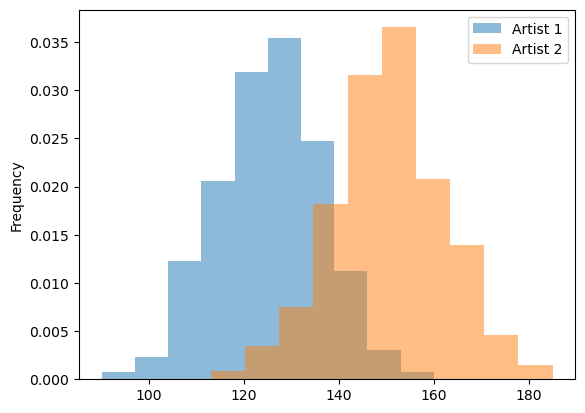

In [16]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: \s+ will match on any sequences of whitespace characters of single or multiple spaces, tabs, any length, and newlines.

In [17]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

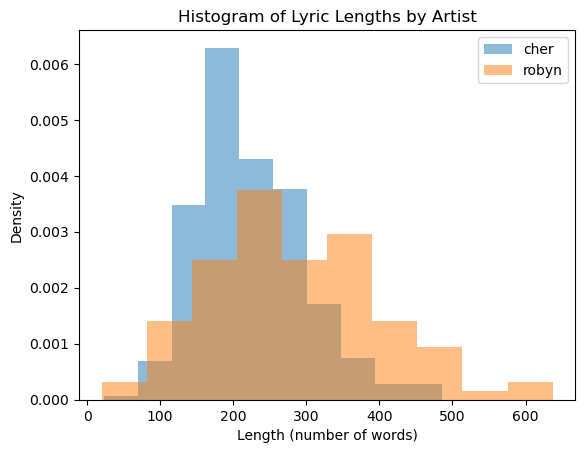

In [18]:
# Your lyric length comparison chart here. 

# Function to read lyrics from a file and return the number of words
def count_words_in_lyrics(file_path):
    with open(file_path, 'r') as file:
        lyrics = file.read()
    tokens = tokenize_lyrics(lyrics)
    return len(tokens)

# Function to tokenize lyrics
collapse_whitespace = re.compile(r'\s+')
def tokenize_lyrics(lyric):
    """Strip and split on whitespace"""
    return [item.lower() for item in collapse_whitespace.split(lyric)]

# Paths to the artist folders
lyrics_base_path = '/Users/amyou/Desktop/ADS 509/ADS 509 Module 2/M1 Results/lyrics'
artist_folders = ['cher', 'robyn']

# Initialize lists to store lyric lengths
lyric_lengths = {'cher': [], 'robyn': []}

# Process each artist's folder
for artist in artist_folders:
    artist_path = os.path.join(lyrics_base_path, artist)
    for file_name in os.listdir(artist_path):
        file_path = os.path.join(artist_path, file_name)
        if os.path.isfile(file_path):
            length = count_words_in_lyrics(file_path)
            lyric_lengths[artist].append(length)

# Convert to DataFrame
data = []
for artist, lengths in lyric_lengths.items():
    data.extend([(artist, length) for length in lengths])
df = pd.DataFrame(data, columns=['artist', 'length'])

# Plot histograms
df.groupby('artist')['length'].plot(kind='hist', density=True, alpha=0.5, legend=True)
plt.xlabel('Length (number of words)')
plt.ylabel('Density')
plt.title('Histogram of Lyric Lengths by Artist')
plt.legend()
plt.show()
